In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [4]:
df=pd.read_csv("/kaggle/input/fitness-tracker-dataset/gym_members_exercise_tracking_synthetic_data.csv")

In [5]:
df=df.dropna(how="any",axis=0)

In [6]:
label_encoder=LabelEncoder()
df["Gender"]=label_encoder.fit_transform(df["Gender"])
df["Workout_Type"]=label_encoder.fit_transform(df["Workout_Type"])

In [7]:
df.dtypes

Age                              float64
Gender                             int64
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                           object
Avg_BPM                          float64
Resting_BPM                      float64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                       int64
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)    float64
Experience_Level                 float64
BMI                              float64
dtype: object

In [8]:
df["Max_BPM"].unique()

array(['174', '166', '187', '177', '161', '191', '181', '195', '186',
       '176', '197', '171', '196', '173', '184', '165', '183', '189',
       '193', '198', '199', '180', '178', '\\t182', '192', '160', '194',
       '168', '167', '188', '172', '182', '164', '175', '163', '190',
       '162', '169', '185', '170', '179', '\\n175'], dtype=object)

In [9]:
df["Max_BPM"]=df["Max_BPM"].astype(str).apply(lambda x: re.sub(r"[\Wa-zA-Z]+"," ",x))

In [10]:
df["Max_BPM"].unique()

array(['174', '166', '187', '177', '161', '191', '181', '195', '186',
       '176', '197', '171', '196', '173', '184', '165', '183', '189',
       '193', '198', '199', '180', '178', ' 182', '192', '160', '194',
       '168', '167', '188', '172', '182', '164', '175', '163', '190',
       '162', '169', '185', '170', '179', ' 175'], dtype=object)

<Axes: >

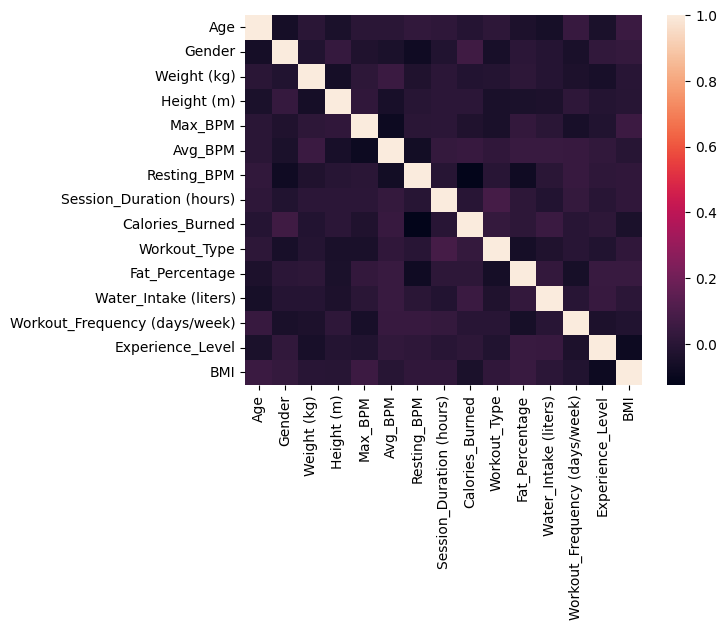

In [11]:
sns.heatmap(df.corr())

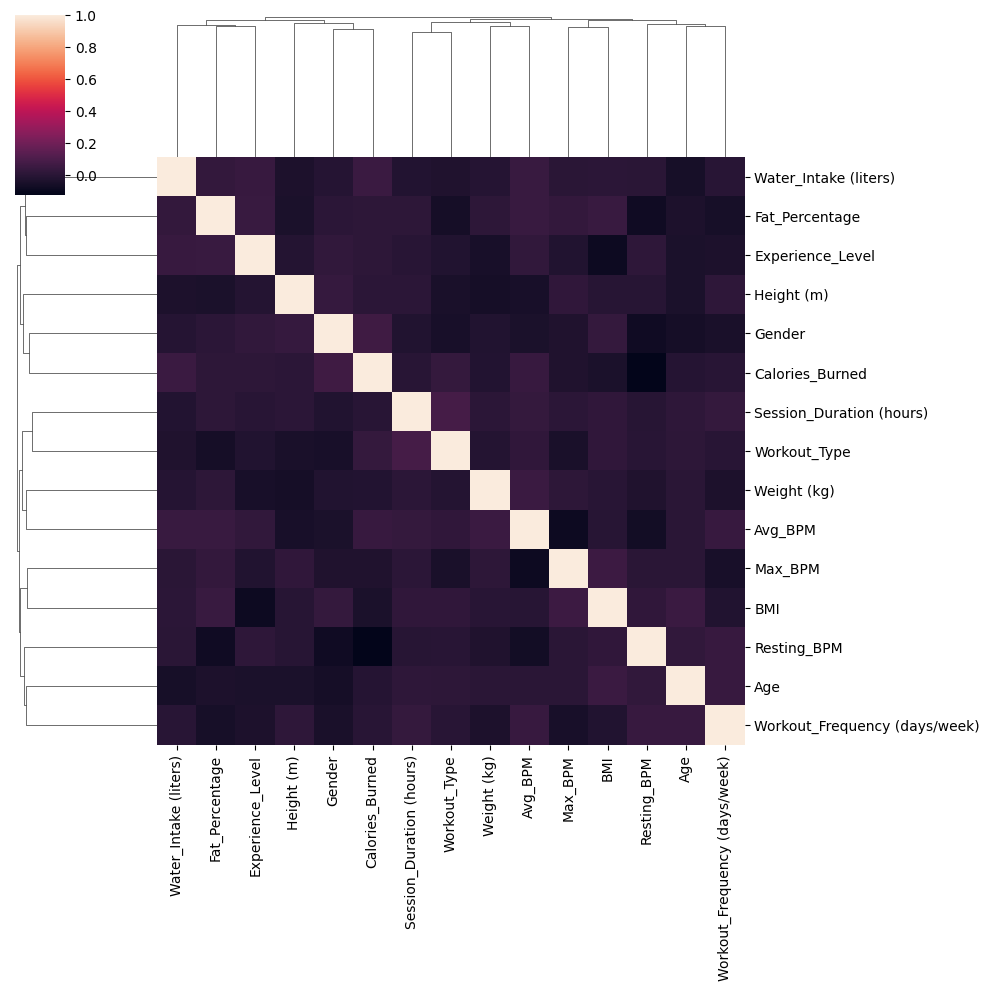

In [12]:
sns.clustermap(df.corr())

In [13]:
X=df.drop(columns=["BMI"])
Y=df["BMI"]

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [15]:
Y_train.nunique()

722

In [16]:
random_reg=RandomForestRegressor()
random_reg.fit(X_train,Y_train)
random_reg.score(X_test,Y_test)

-0.05661090932037571

In [17]:
X_train.shape

(1019, 14)

# Deep Learning# 

In [26]:
from keras.layers import Layer,Dense,Flatten,Dropout,BatchNormalization,Input
from keras.models import Model,Sequential
from keras.initializers import HeNormal,GlorotUniform
from keras.regularizers import l2,l1_l2
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [19]:
early_stopping=EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=1
)

In [20]:
inputs=Input(shape=(14,))
d=Dense(32,activation="relu",kernel_initializer="HeNormal",kernel_regularizer=l2(0.01))(inputs)
d=Dense(64,activation="relu",kernel_initializer="HeNormal",kernel_regularizer=l2(0.01))(d)
d=Dense(128,activation="relu",kernel_initializer="HeNormal",kernel_regularizer=l2(0.01))(d)
d=Dense(256,activation="relu",kernel_initializer="HeNormal",kernel_regularizer=l2(0.01))(d)
d=Dense(556,activation="relu",kernel_initializer="HeNormal",kernel_regularizer=l2(0.01))(d)
d=Dense(1056,activation="relu",kernel_initializer="HeNormal",kernel_regularizer=l2(0.01))(d)
d=Dense(2056,activation="relu",kernel_initializer="HeNormal",kernel_regularizer=l2(0.01))(d)
outputs=Dense(1)(d)
model=Model(inputs,outputs)
optimizer=Adam(learning_rate=0.01,beta_1=0.99,beta_2=0.99)
model.compile(optimizer=optimizer,loss="mse",metrics=["mae"])
model.fit(X_train,Y_train,epochs=32,batch_size=32,validation_data=(X_test,Y_test),callbacks=[early_stopping])

Epoch 1/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 1432512512.0000 - mae: 11595.3584 - val_loss: 310.0600 - val_mae: 10.9611
Epoch 2/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 312.5930 - mae: 8.7433 - val_loss: 510.4058 - val_mae: 12.6867
Epoch 3/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 474.3851 - mae: 9.3758 - val_loss: 532.1904 - val_mae: 8.2401
Epoch 4/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 745.4443 - mae: 13.4517 - val_loss: 733.1821 - val_mae: 10.7934
Epoch 5/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 19637.7500 - mae: 71.6206 - val_loss: 2966.6841 - val_mae: 34.0250
Epoch 6/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 42887.4961 - mae: 172.9726 - val_loss: 29128.8945 - val_mae: 157.3530
Epoch 6: early stopping


In [21]:
model.predict(X_test.iloc[:12,:])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


array([[ 76.86832],
       [230.03947],
       [205.4673 ],
       [155.39253],
       [222.9594 ],
       [ 95.9232 ],
       [174.22914],
       [212.3343 ],
       [ 94.18565],
       [188.36015],
       [157.3228 ],
       [302.2086 ]], dtype=float32)

In [22]:
Y_test[:12]

694     13.85
1320    43.74
994     28.03
1191    12.32
1604    15.72
962     20.80
1428    19.45
1304    18.38
795     16.69
411     19.65
145     21.11
1261    19.63
Name: BMI, dtype: float64

# # Quantum Deep Learning# 

In [23]:
!pip install cirq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 82.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 63.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 50.7 M

In [24]:
import cirq
import tensorflow as tf

In [33]:
def quantum_circuit(data):
    qubit=[cirq.GridQubit(0,i) for i in range(14)]
    circuit=cirq.Circuit()
    for i,value in enumerate(data):
        q=i%len(qubit)
        circuit.append(cirq.rx(value*np.pi).on(qubit[q]))
        circuit.append(cirq.H(qubit[q]))
        circuit.append(cirq.ry(value*np.pi).on(qubit[q]))
        if (i+1)%len(qubit)<len(qubit):
            circuit.append(cirq.CNOT(qubit[q],qubit[(i+1)%len(qubit)]))
            circuit.append(cirq.measure(qubit[q],key=f"qubit_{i}"))
    return circuit,qubit
def run_quantum_circuit(data):
    results=[]
    simulator=cirq.Simulator()
    for inputs_data in data:
        circuit,qubit=quantum_circuit(inputs_data)
        result=simulator.run(circuit)
        measure0=[]
        for i in range(len(inputs_data)):
            measure0.append(result.measurements[f"qubit_{i}"].flatten()[0])
        results.append(measure0)
    return np.array(results,dtype=np.float32)
class QuantumLayer(Layer):
    def __init__(self):
        super(QuantumLayer,self).__init__()
    def call(self,inputs):
        outputs=tf.numpy_function(run_quantum_circuit,[inputs],tf.float32)
        outputs.set_shape(inputs.shape)
        return outputs
model2=Sequential([
    QuantumLayer(),
    Dense(32,activation="relu",kernel_initializer="HeNormal",kernel_regularizer=l2(0.01)),
    Dense(64,activation="relu",kernel_initializer="HeNormal",kernel_regularizer=l2(0.01)),
    Dense(128,activation="relu",kernel_initializer="HeNormal",kernel_regularizer=l2(0.01)),
    Dense(256,activation="relu",kernel_initializer="HeNormal",kernel_regularizer=l2(0.01)),
    Dense(556,activation="relu",kernel_initializer="HeNormal",kernel_regularizer=l2(0.01)),
    Dense(1056,activation="relu",kernel_initializer="HeNormal",kernel_regularizer=l2(0.01)),
    Dense(2056,activation="relu",kernel_initializer="HeNormal",kernel_regularizer=l2(0.01)),
    Dense(1)
])
model2.compile(optimizer="adam",loss="mse",metrics=["mae"])
model2.fit(X_train,Y_train,epochs=32,batch_size=32,validation_data=(X_test,Y_test),callbacks=[early_stopping])

Epoch 1/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 34s 976ms/step - loss: 183.3832 - mae: 8.0023 - val_loss: 110.6746 - val_mae: 5.5768
Epoch 2/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 30s 956ms/step - loss: 114.6809 - mae: 5.9340 - val_loss: 104.7081 - val_mae: 5.8608
Epoch 3/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 30s 945ms/step - loss: 104.6241 - mae: 5.8099 - val_loss: 107.8633 - val_mae: 6.0087
Epoch 4/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 30s 943ms/step - loss: 103.8326 - mae: 5.9126 - val_loss: 94.9822 - val_mae: 6.0400
Epoch 5/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 30s 946ms/step - loss: 93.0417 - mae: 5.6038 - val_loss: 89.7175 - val_mae: 5.5092
Epoch 6/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 30s 940ms/step - loss: 85.7133 - mae: 5.2784 - val_loss: 91.9956 - val_mae: 5.6464
Epoch 7/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 30s 937ms/step - loss: 90.8152 - mae: 5.7374 - val_loss: 84.0608 - val_mae: 5.7516
Epoch 8/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 30s 938ms/step - loss: 90.6263 - mae: 5.7916 - val_loss: 91.6239 - val_mae: 6.3540
Epoch 9/32
32/32 ━━━━━━━━

In [34]:
model2.predict(X_test.iloc[:12,:])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


array([[18.419523],
       [17.33466 ],
       [16.58524 ],
       [18.392195],
       [19.104616],
       [15.428427],
       [17.726152],
       [15.537174],
       [16.96937 ],
       [16.773603],
       [17.542782],
       [19.233818]], dtype=float32)

In [35]:
Y_test[:12]

694     13.85
1320    43.74
994     28.03
1191    12.32
1604    15.72
962     20.80
1428    19.45
1304    18.38
795     16.69
411     19.65
145     21.11
1261    19.63
Name: BMI, dtype: float64